##Implement the Naive Bayes


### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Define the NaiveBayes class


1.   Implement the training logic in the fit method
2.   Implement the prediction logic in the predict method

1.   Implement the plot_histogram method
2.   Implement the  calculate_accuracy method

1.   Implement the plot_effective_features method




In [2]:
class NaiveBayes:

  def fit(self, x_train, y_train):
    self.class_labels = np.unique(y_train)
    self.feature_labels = np.unique(x_train)
    self.class_probabilities = np.zeros(len(self.class_labels))
    self.feature_probabilities = np.zeros((len(self.feature_labels), len(self.class_labels)))

    for i, label in enumerate(self.class_labels):
        class_instances = x_train[y_train == label]
        self.class_probabilities[i] = len(class_instances) / len(x_train)
        
        for j, feature in enumerate(self.feature_labels):
            self.feature_probabilities[j, i] = np.sum(class_instances == feature) / len(class_instances)
  def predict(self, x_test):
    predictions = np.zeros(len(x_test), dtype=int)

    for i, instance in enumerate(x_test):
        instance_probabilities = np.zeros(len(self.class_labels))

        for j, label in enumerate(self.class_labels):
            class_probability = self.class_probabilities[j]

            for k, feature in enumerate(instance):
                feature_probability = self.feature_probabilities[k, j]
                class_probability *= feature_probability

            instance_probabilities[j] = class_probability

        predictions[i] = np.argmax(instance_probabilities)

    return predictions

  def plot_feature_probabilities(self,feature_probabilities, class_labels):
    fig, ax = plt.subplots(figsize=(8, 6))
    index = np.arange(len(feature_probabilities.keys()))
    bar_width = 0.2
    opacity = 0.8

    for i, label in enumerate(class_labels):
        probabilities = []
        for value in feature_probabilities.keys():
            probabilities.append(feature_probabilities[value][label])
        ax.bar(index + i * bar_width, probabilities, bar_width, alpha=opacity, label=label)

    ax.set_xlabel('Features')
    ax.set_ylabel('Probabilities')
    ax.set_title('Feature Probabilities')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(list(feature_probabilities.keys()))
    ax.legend()

    plt.tight_layout()
    plt.show()

    class_labels = ['Age', 'Fare', 'Sex', 'Pclass']

  def calculate_accuracy(self,predictions, y_test):
    correct_predictions = np.sum(predictions == y_test)
    total_predictions = len(y_test)
    accuracy = correct_predictions / total_predictions * 100
    return accuracy
  
  def plot_effective_features(self,effective_features):
    features = list(effective_features.keys())
    scores = list(effective_features.values())

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(features, scores)
    ax.set_xlabel('Features')
    ax.set_ylabel('Score')
    ax.set_title('Feature Effectiveness')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show() 

In [3]:
# Load the Titanic dataset
titanic_df = pd.read_csv('/content/train.csv')

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data PreProcessing

In [7]:
# Drop unnecessary columns
titanic_df.drop(["Name", "Ticket", "Cabin", "Embarked","PassengerId","SibSp","Parch"], axis=1, inplace=True)

# Drop rows with missing values
titanic_df.dropna(inplace=True)

# Convert categorical variables into numerical
titanic_df["Sex"] = titanic_df["Sex"].map({"female": 0, "male": 1})



### Splitting up the labels and features into training and testing sets.

In [8]:
# Split the dataset into features (x) and output (y)
x = titanic_df.drop("Survived", axis=1).values
y = titanic_df["Survived"].values

# Normalize the features
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

# Split the dataset into training and testing sets
train_size = int(0.8 * len(x))
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

### Instantiate the NaiveBayes class, fit the model, and make predictions

In [9]:
# Assuming you have your training data stored in x_train and y_train
naive_bayes = NaiveBayes()
naive_bayes.fit(x_train, y_train)

# Assuming you have your testing data stored in x_test
predictions = naive_bayes.predict(x_test)

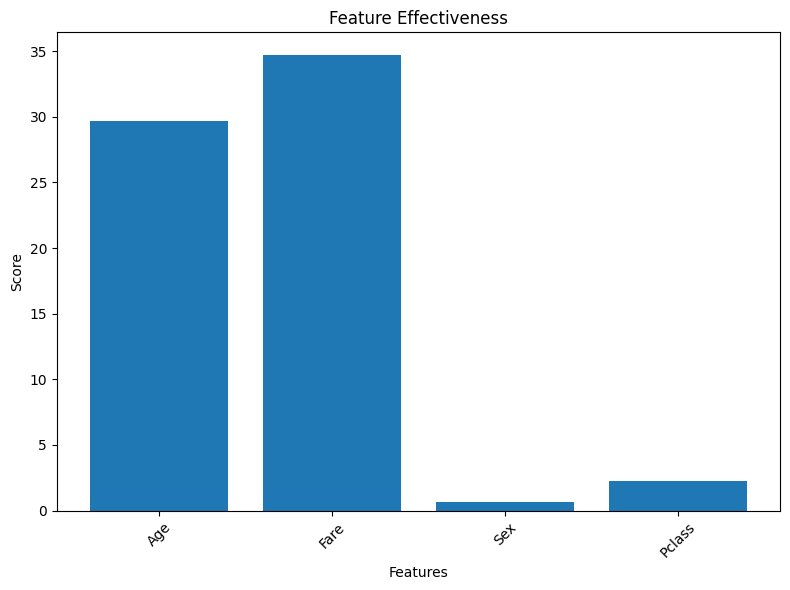

In [10]:
# Assuming you have the effective features and their scores stored in a dictionary named effective_features
effective_features = {
      'Age': np.mean(titanic_df['Age']),
      'Fare': np.mean(titanic_df['Fare']),
      'Sex': np.mean(titanic_df['Sex']),
      'Pclass': np.mean(titanic_df['Pclass'])
    }

# Plot effective features
naive_bayes.plot_effective_features(effective_features)

Accuracy: 39.16083916083916


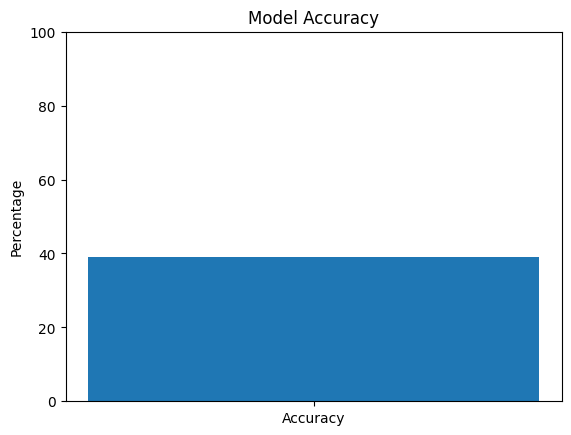

In [11]:
# Calculate accuracy
accuracy = naive_bayes.calculate_accuracy(predictions,y_test)
print("Accuracy:", accuracy)

# Plot accuracy
labels = ['Accuracy']
values = [accuracy]

fig, ax = plt.subplots()
ax.bar(labels, values)
ax.set_ylabel('Percentage')
ax.set_title('Model Accuracy')
plt.ylim(0, 100)

plt.show()